Data dimensions: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


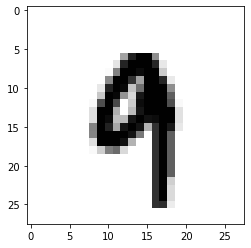

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
# https://keras.io/examples/vision/mnist_convnet/
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test_raw) = mnist.load_data()
# W zestawie dostajemy zestaw czarno białych 'obrazów'
# o wymiarach 28x28 i wartości piksela 0-255

# Mapujemy wartości 0-255 na przedział 0-1
rand_image_id = random.randint(0, len(x_train) - 1)
plt.imshow(x_train[rand_image_id], cmap='gray_r')
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'Data dimensions: {np.shape(x_train)}')
print(f'{len(x_train)} training samples')
print(f'{len(x_test)} testing samples')

# Zmiana cyfry na odpowiednią wartość w wektorze
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

In [2]:
network = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
    ]
)
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [3]:
batch_size = 128
epochs = 15

network.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
network.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

Epoch 1/15
422/422 [==============================] - 14s 32ms/step - loss: 0.7802 - accuracy: 0.7578 - val_loss: 0.0887 - val_accuracy: 0.9758
Epoch 2/15
422/422 [==============================] - 13s 31ms/step - loss: 0.1247 - accuracy: 0.9618 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0876 - accuracy: 0.9717 - val_loss: 0.0492 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0424 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0367 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0356 - val_accuracy:

In [4]:
score = network.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
outputs = np.argmax(network.predict(x_test), axis=-1)

Test loss: 0.025298265740275383
Test accuracy: 0.9921000003814697


10000


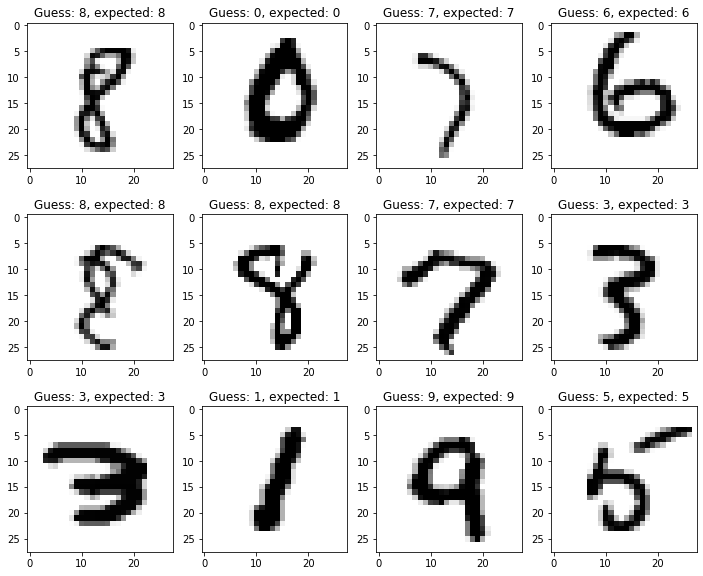

In [16]:
pics = np.squeeze(x_test, axis=-1)
rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
begin = random.randint(0, len(outputs) - 13)
for i in range(begin, begin + 13):
    square = axes[(i-begin-1)//cols, (i-begin-1)%cols]
    square.imshow(pics[i], cmap='gray_r')
    square.set_title(f'Guess: {outputs[i]}, expected: {y_test_raw[i]}')

Total correct guesses: 9921 of 10000
Few of the misses:


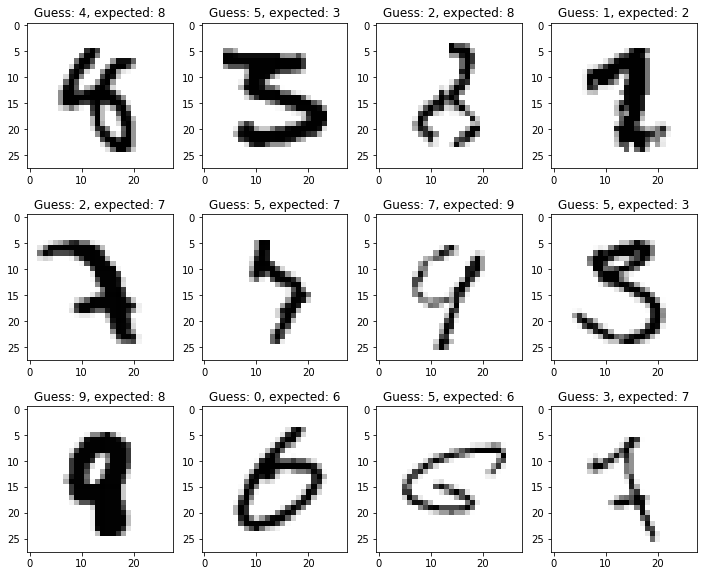

In [25]:
hit_count = 0
misses = list()
for pic, expected, got in zip(pics, y_test_raw, outputs):
    if expected == got:
        hit_count += 1
        continue
    misses.append((pic, expected, got))
    
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
for i, miss in enumerate(misses):
    if 12 <= i:
        break
    square = axes[i//cols, i%cols]
    square.imshow(miss[0], cmap='gray_r')
    square.set_title(f'Guess: {miss[2]}, expected: {miss[1]}')
print(f'Total correct guesses: {hit_count} of {len(outputs)}\nFew of the misses:')